In [210]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate, optimize
from sklearn import linear_model
pd.set_option('display.max_columns', None)
import warnings 
warnings.filterwarnings('ignore')

In [2]:
confirmed_global = pd.read_csv('data/time_series_covid19_confirmed_global.csv')
death_global = pd.read_csv('data/time_series_covid19_deaths_global.csv')

In [3]:
confirmed_global.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176,1279,1351,1463,1531
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663,678,712,726
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,601,601,638,646,659,673,673,696,704,713,717,717,723,723,731,738,738
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19,19,19,19,19,19,19,19,19,24,24,24,24,25,25,25,25,26


In [4]:
death_global.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,4,4,4,4,4,4,4,6,6,7,7,11,14,14,15,15,18,18,21,23,25,30,30,30,33,36,36,40,42,43,47,50
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,2,2,2,2,2,4,5,5,6,8,10,10,11,15,15,16,17,20,20,21,22,22,23,23,23,23,23,24,25,26,26,26,26,26,26,27,27,27,27,28
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,4,4,4,7,9,11,15,17,17,19,21,25,26,29,31,35,44,58,86,105,130,152,173,193,205,235,256,275,293,313,326,336,348,364,367,375,384,392,402,407,415,419,425
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,3,3,3,6,8,12,14,15,16,17,18,21,22,23,25,26,26,29,29,31,33,33,35,35,36,37,37,37,37,40,40,40
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [11]:
def get_cases_by_country(country):
    if country != "Global":
        cases_rows = confirmed_global.loc[confirmed_global['Country/Region'] == country]
        death_rows = death_global.loc[confirmed_global['Country/Region'] == country]
    else:
        cases_rows = confirmed_global
        death_rows = death_global
    cases = {'Confirmed': {date: sum(cases_rows[date]) for date in cases_rows.columns[4:]},
             'Fatalities': {date: sum(death_rows[date]) for date in death_rows.columns[4:]}}
    df_cases = pd.DataFrame(cases,index=cases['Confirmed'].keys())
    return df_cases

In [12]:
def plot_cases_by_country(country):
    df_cases = get_cases_by_country(country)    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
    df_cases.plot(ax=ax1)
    ax1.set_title(country + " confirmed cases", size=13)
    ax1.set_ylabel("Number of cases", size=13)
    ax1.set_xlabel("Date", size=13)
    df_cases['Fatalities'].plot(ax=ax2, color='orange')
    ax2.set_title(country + " deceased cases", size=13)
    ax2.set_ylabel("Number of cases", size=13)
    ax2.set_xlabel("Date", size=13)
    fig.show()

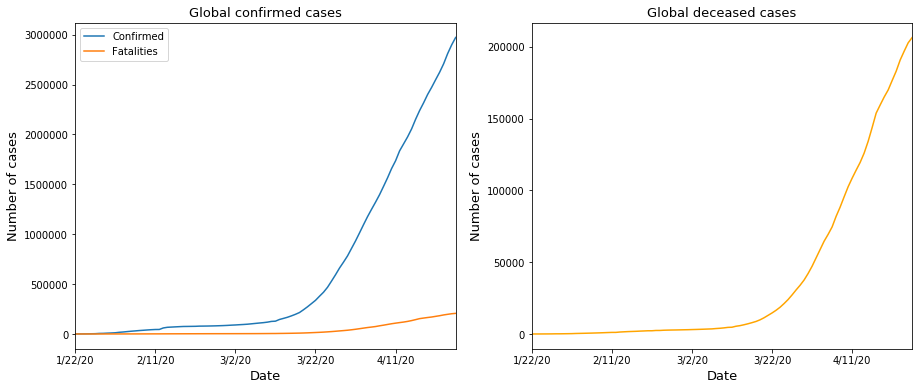

In [6]:
plot_cases_by_country("Global")

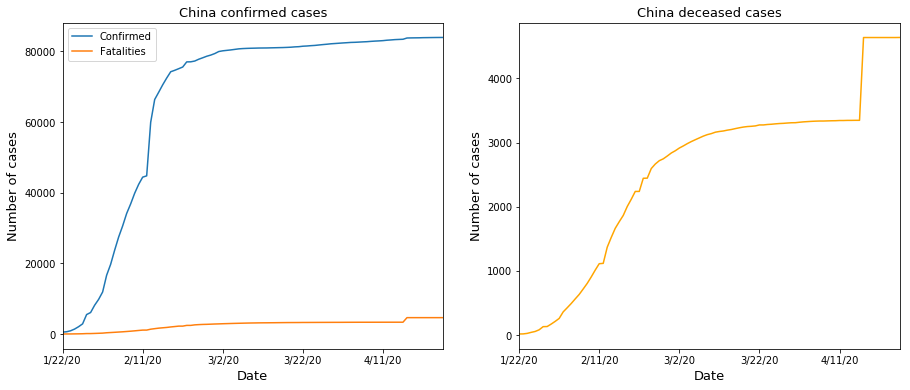

In [116]:
plot_cases_by_country("China")

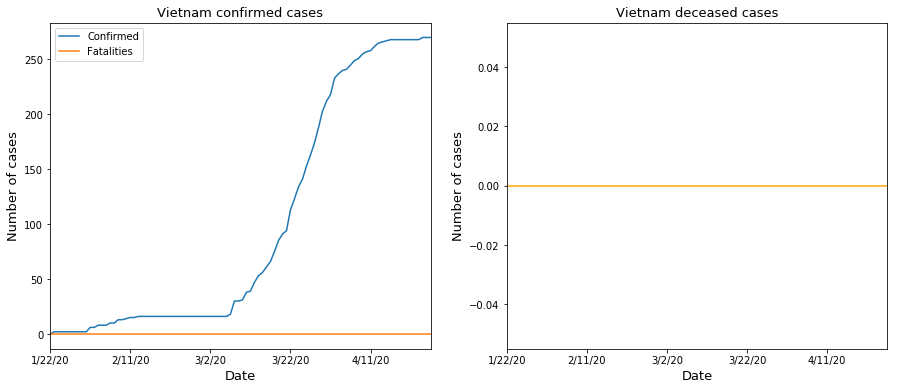

In [117]:
plot_cases_by_country('Vietnam')

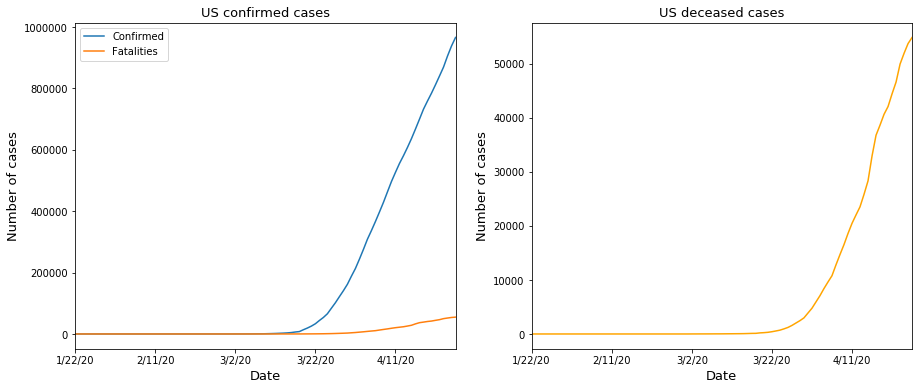

In [118]:
plot_cases_by_country('US')

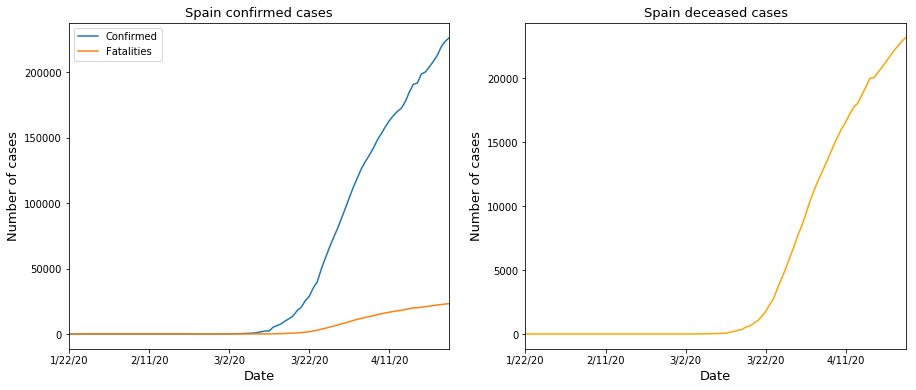

In [77]:
plot_cases_by_country('Spain')

In [7]:
# Susceptible equation
def fS(N, S, I, beta):
    fS = -beta*S*I
    return fS

# Infected equation
def fI(N, S, I, beta, gamma):
    fI = beta*S*I - gamma*I
    return fI

# Recovered/deceased equation
def fR(N, I, gamma):
    fR = gamma*I
    return fR

In [8]:
def rK4(N, S, I, R, fS, fI, fR, beta, gamma, hs):
    S1 = fS(N, S, I, beta)*hs
    I1 = fI(N, S, I, beta, gamma)*hs
    R1 = fR(N, I, gamma)*hs
    Sk = S + S1*0.5
    Ik = I + I1*0.5
    Rk = R + R1*0.5
    S2 = fS(N, Sk, Ik, beta)*hs
    I2 = fI(N, Sk, Ik, beta, gamma)*hs
    R2 = fR(N, Ik, gamma)*hs
    Sk = S + S2*0.5
    Ik = I + I2*0.5
    Rk = R + R2*0.5
    S3 = fS(N, Sk, Ik, beta)*hs
    I3 = fI(N, Sk, Ik, beta, gamma)*hs
    R3 = fR(N, Ik, gamma)*hs
    Sk = S + S3
    Ik = I + I3
    Rk = R + R3
    S4 = fS(N, Sk, Ik, beta)*hs
    I4 = fI(N, Sk, Ik, beta, gamma)*hs
    R4 = fR(N, Ik, gamma)*hs
    S = S + (S1 + 2*S2 + 2*S3 + S4)/6
    I = I + (I1 + 2*I2 + 2*I3 + I4)/6
    R = R + (R1 + 2*R2 + 2*R3 + R4)/6
    return S, I, R

In [9]:
def SIR(N, I0, beta, gamma, hs):
    
    """
    N = total number of population
    beta = transition rate S->I
    gamma = transition rate I->R
    k =  denotes the constant degree distribution of the network (average value for networks in which 
    the probability of finding a node with a different connectivity decays exponentially fast
    hs = jump step of the numerical integration
    """
    
    # Initial condition
    S = float(N-1)/N - I0
    I = float(1)/N + I0
    R = 0.

    sus, inf, rec= [],[],[]
    for i in range(10000): # Run for a certain number of time-steps
        sus.append(S)
        inf.append(I)
        rec.append(R)
        S,I,R = rK4(N, S, I, R, fS, fI, fR, beta, gamma, hs)

    return sus, inf, rec

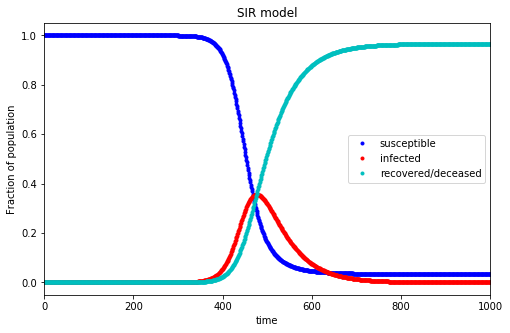

In [10]:
N = 7800*(10**6)
b0 = 0
beta = 0.7
gamma = 0.2
hs = 0.1

sus, inf, rec = SIR(N, b0, beta, gamma, hs)

f = plt.figure(figsize=(8,5)) 
plt.plot(sus, 'b.', label='susceptible');
plt.plot(inf, 'r.', label='infected');
plt.plot(rec, 'c.', label='recovered/deceased');
plt.title("SIR model")
plt.xlabel("time", fontsize=10);
plt.ylabel("Fraction of population", fontsize=10);
plt.legend(loc='best')
plt.xlim(0,1000)
plt.show()

[1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 4.000e+00 7.000e+00 2.000e+00 1.700e+01
 1.300e+01 3.900e+01 3.600e+01 4.500e+01 5.700e+01 3.700e+01 1.410e+02
 1.000e+02 1.730e+02 4.000e+02 6.220e+02 5.820e+02 0.000e+00 2.955e+03
 1.159e+03 1.407e+03 2.144e+03 1.806e+03 2.162e+03 4.053e+03 2.447e+03
 4.964e+03 3.394e+03 6.368e+03 4.749e+03 9.630e+03 8.271e+03 7.933e+03
 7.516e+03 6.875e+03 7.846e+03 7.967e+03 8.195e+03 7.947e+03 7.134e+03
 6.969e+03 5.478e+03 5.029e+03 5.267e+03 6.278e+03 5.002e+03 5.051e+03
 4.754e+03 3.804e+03 3.268e+03 2.442e+03 5.103e+03 7.304e+03 5.891e+03
 8.870e+02 6.948e+03 1.536e+03 3.968e+03 4.211e+03 4.635e+03 6.740e+03
 3.995e+03 2.870e+03]


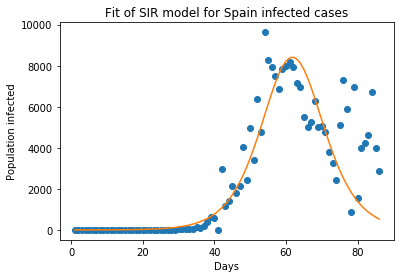

Optimal parameters: beta = 9.075666778422505  and gamma =  8.903973644907


In [75]:
# population = 1.393*1e9
# country = "China"

# population = 328.2*1e6
# country = 'US'
population = float(46750238)
country = 'Spain'
# population = float(95400000)
# country = 'Vietnam'

df_cases = get_cases_by_country(country).diff().fillna(0)
ydata = df_cases['Confirmed'][10:]
xdata = [i for i in range(1,len(ydata)+1)]
y_noise = 0.2 * np.random.normal(size=len(xdata))
# ydata = np.array(ydata+y_noise, dtype=float)
ydata = np.array(ydata, dtype=float)
xdata = np.array(xdata, dtype=float)
print(ydata)
N = population
inf0 = ydata[0]
sus0 = N - inf0
rec0 = 0.0

def sir_model(y, x, beta, gamma):
    sus = -beta * y[0] * y[1] / N
    rec = gamma * y[1]
    inf = -(sus + rec)
    return sus, inf, rec

def fit_odeint(x, beta, gamma):
    return integrate.odeint(sir_model, (sus0, inf0, rec0), x, args=(beta, gamma))[:,1]

popt, pcov = optimize.curve_fit(fit_odeint, xdata, ydata)
fitted = fit_odeint(xdata, *popt)

plt.plot(xdata, ydata, 'o')
plt.plot(xdata, fitted)
plt.title("Fit of SIR model for Spain infected cases")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])


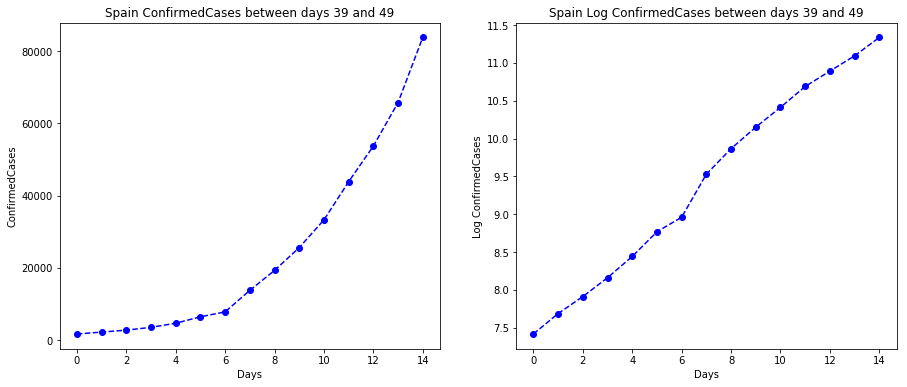

In [114]:
country = "US"
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

df_cases = get_cases_by_country(country)
y1 = df_cases['Confirmed'][50:65]
x1 = range(0, len(y1))
ax1.plot(x1, y1, 'bo--')
ax1.set_title("Spain ConfirmedCases between days 39 and 49")
ax1.set_xlabel("Days")
ax1.set_ylabel("ConfirmedCases")

y2 = y1.apply(lambda x: np.log(x))
x2 = range(0, len(y2))
ax2.plot(x2, y2, 'bo--')
ax2.set_title("Spain Log ConfirmedCases between days 39 and 49")
ax2.set_xlabel("Days")
ax2.set_ylabel("Log ConfirmedCases")
fig.show()

In [254]:
def split_data(df, start, end):
    y_train = df.iloc[start:end].to_numpy()
    x_train = np.arange(y_train.shape[0]).reshape(-1,1)
    x_test = np.arange(y_train.shape[0],y_train.shape[0]+10).reshape(-1,1)
    y_test = df.iloc[end:end+10].to_numpy()

    return x_train, y_train, x_test, y_test


def lin_reg(X_train, Y_train, X_test):
    regr = linear_model.LinearRegression()
    regr.fit(X_train, Y_train)
    y_pred = regr.predict(X_test)
    return regr, y_pred

In [255]:
def plot_log_linear_country(country, train_start, train_end):
    df = get_cases_by_country(country)
    df = df.astype('float64').apply(lambda x: np.log1p(x))
    X_train, Y_train, X_test, Y_test = split_data(df['Confirmed'], train_start, train_end)
    model, pred = lin_reg(X_train, Y_train, X_test)
    
    plt.plot(np.concatenate((X_train,X_test),axis=None), np.expm1(np.concatenate((Y_train,pred),axis=None)))
    plt.plot(np.concatenate((X_train,X_test),axis=None), np.expm1(np.concatenate((Y_train,Y_test),axis=None)))      
    plt.legend(['Predicted cases', 'Actual cases'], loc='upper left')
    plt.xlabel("Day count")
    plt.ylabel("Confirmed Cases")
    plt.show()    

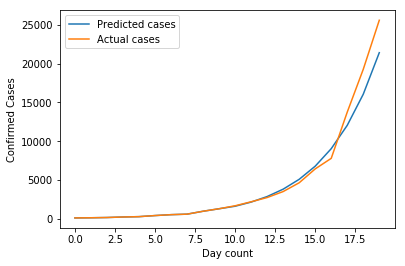

In [256]:
plot_log_linear_country('US', 40,50)

In [302]:
def logistic_function(x, a, b, c, d):
    return a / (1. + np.exp(-c * (x - d))) + b

def fit_logistic(X_train,Y_train,X_test):
    # Initial guess
    p0 = [0,1,1,0]
    (a_, b_, c_, d_), cov = optimize.curve_fit(logistic_function, X_train, Y_train, bounds=(0, [500000., 10., 1000., 1000., ]), p0=p0, maxfev=10**9)
    y_fit = logistic_function(X_test, a_, b_, c_, d_)
    
    return y_fit, (a_, b_, c_, d_), cov


def plot_logistic_country(country,start,end):
    df = get_cases_by_country(country)
    df = df['Confirmed']
    Y_train = df.iloc[start:end].to_numpy()
    X_train = np.arange(Y_train.shape[0])
    Y_test = df.to_numpy()
    X_test = np.arange(Y_test.shape[0])
    pred, (a_, b_, c_, d_), cov = fit_logistic(X_train, Y_train, X_test)

    # Plot results
    plt.plot(X_test, pred)
    plt.plot(X_test, Y_test)
    plt.legend(['Predicted cases', 'Actual cases'], loc='upper left')
    plt.xlabel("Day count")
    plt.ylabel("Confirmed Cases")
    plt.show()    

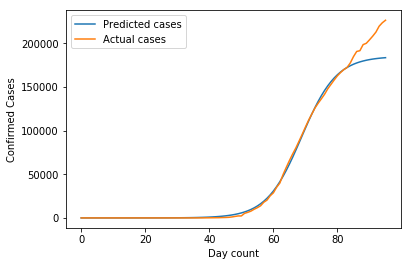

In [304]:
plot_logistic_country('Spain',0,-10)